**MindLens: An AI-Powered Mental Health Sentiment Analyzer**

Objective: Analyze public sentiments related to mental health (e.g., stress, anxiety, depression) and visualize emotional patterns.

In [7]:
pip install pandas seaborn matplotlib nltk textblob wordcloud streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [8]:
from google.colab import files
uploaded = files.upload()


Saving mental health data.csv to mental health data.csv


In [9]:
# importing libraries and datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
nltk.download('punkt')

# Load your dataset
df = pd.read_csv('mental health data.csv')
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [10]:
#clean the data
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|@\S+|#\S+", "", str(text))  # remove URLs, mentions, hashtags
    text = re.sub(r"[^A-Za-z\s]", "", text)  # remove punctuation and numbers
    text = text.lower().strip()  # convert to lowercase
    return text

df['clean_text'] = df['statement'].apply(clean_text)


In [11]:
#sentiment analysis with textblob
def get_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

def get_sentiment_label(score):
    if score > 0.2:
        return "Positive"
    elif score < -0.2:
        return "Negative"
    else:
        return "Neutral"

df['sentiment_score'] = df['clean_text'].apply(get_sentiment_score)
df['sentiment_label'] = df['sentiment_score'].apply(get_sentiment_label)


/tmp/ipython-input-12-875436201.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_label', palette='pastel')


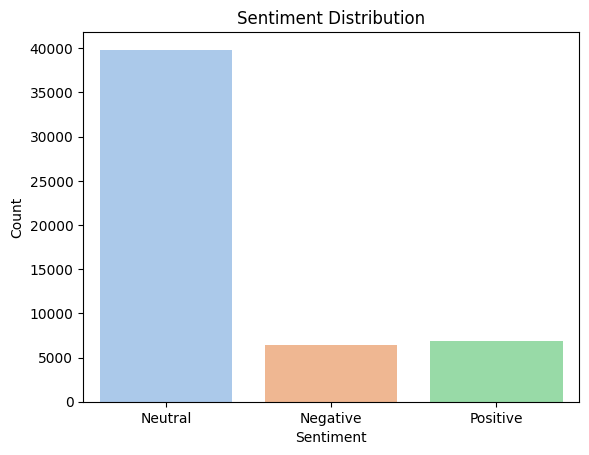

In [12]:
# visualize sentiment distribution
sns.countplot(data=df, x='sentiment_label', palette='pastel')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


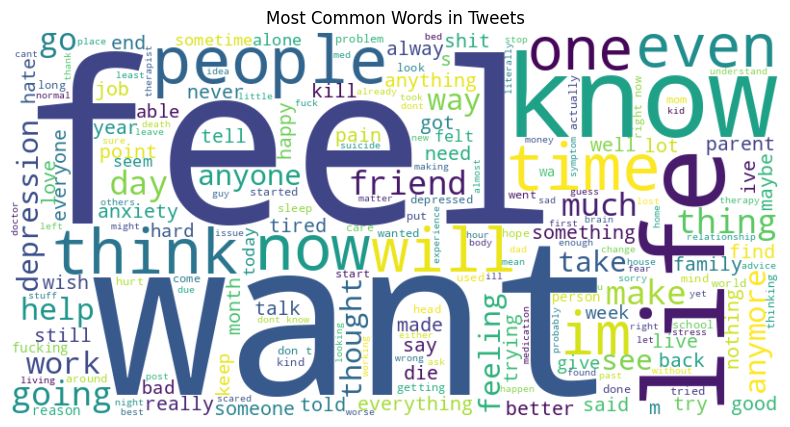

In [13]:
# generate wordcloud
text = " ".join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Tweets")
plt.show()


In [14]:
pip install transformers


In [15]:
from transformers import pipeline


In [16]:
# Load pre-trained model for emotion classification
emotion_classifier = pipeline(
    "text-classification",
    model="j-hartmann/emotion-english-distilroberta-base",
    top_k=1
)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cpu


In [17]:
#define emotion detection function
def detect_emotion(text):
    try:
        result = emotion_classifier(text[:512])[0][0]  # limit to 512 characters
        return result['label']
    except:
        return "Unknown"


In [18]:
# Apply emotion detection safely row by row
from tqdm import tqdm
tqdm.pandas()  # to show progress bar

df['emotion'] = df['clean_text'].progress_apply(detect_emotion)


100%|██████████| 53043/53043 [2:35:55<00:00,  5.67it/s]


/tmp/ipython-input-19-485561359.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='emotion', palette='Set2', order=df['emotion'].value_counts().index)


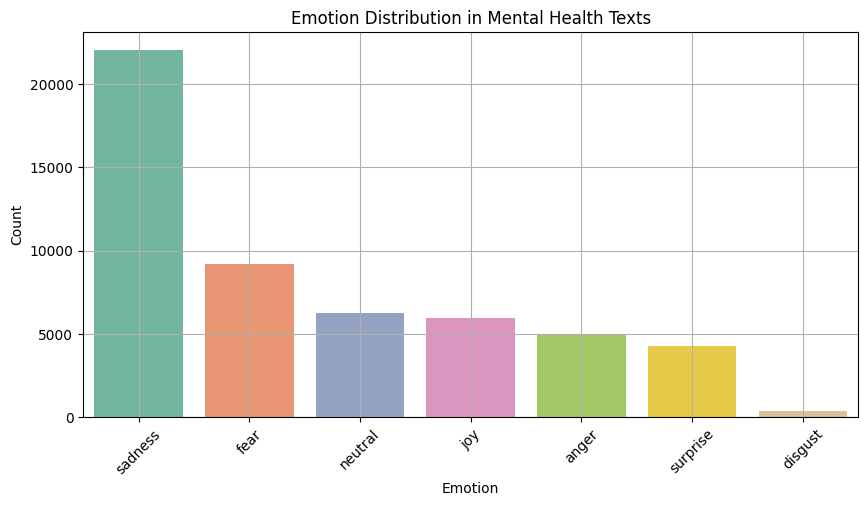

In [19]:
#visualise emotion distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plot emotion counts
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='emotion', palette='Set2', order=df['emotion'].value_counts().index)
plt.title('Emotion Distribution in Mental Health Texts')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [20]:
# combine sentiments and emotion insights
# Cross-tab of sentiment vs emotion
pd.crosstab(df['sentiment_label'], df['emotion'])


emotion,anger,disgust,fear,joy,neutral,sadness,surprise
sentiment_label,,,,,,,
Negative,1077,139,1044,140,233,3407,339
Neutral,3611,197,7508,3533,5097,16725,3161
Positive,299,20,657,2273,947,1889,747


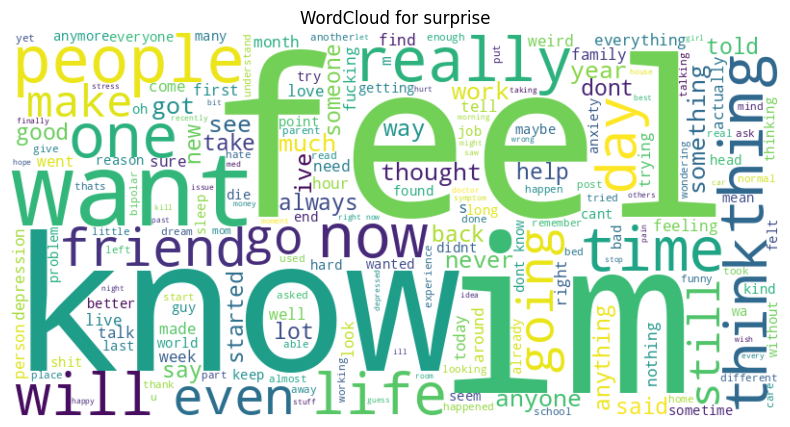

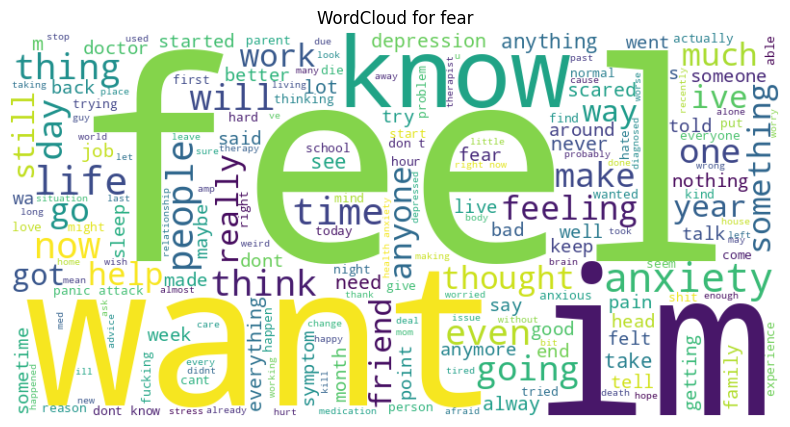

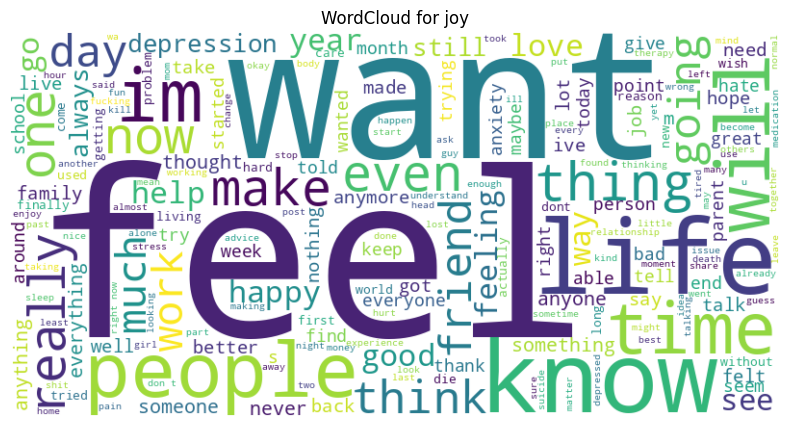

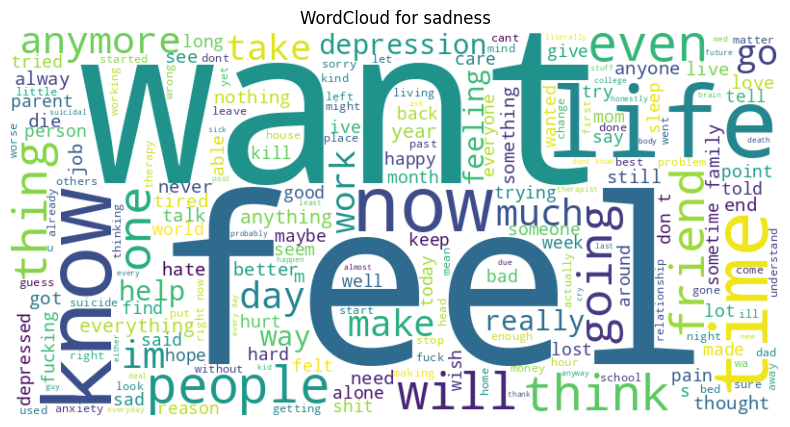

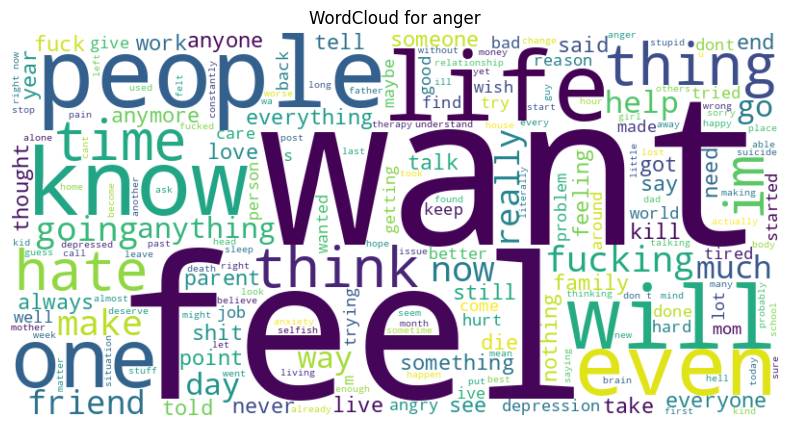

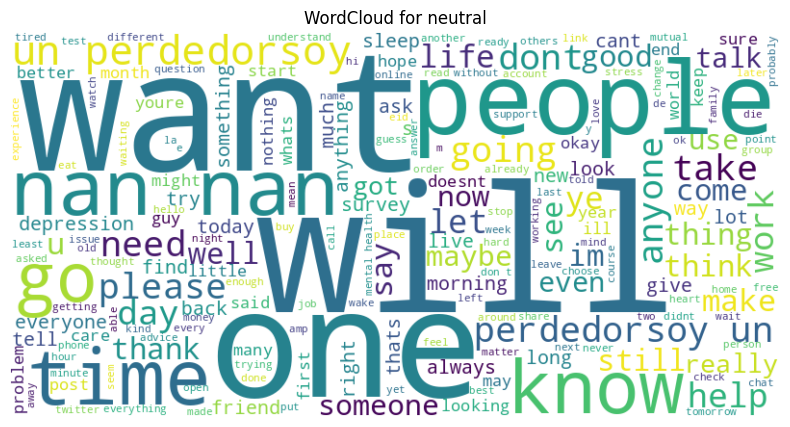

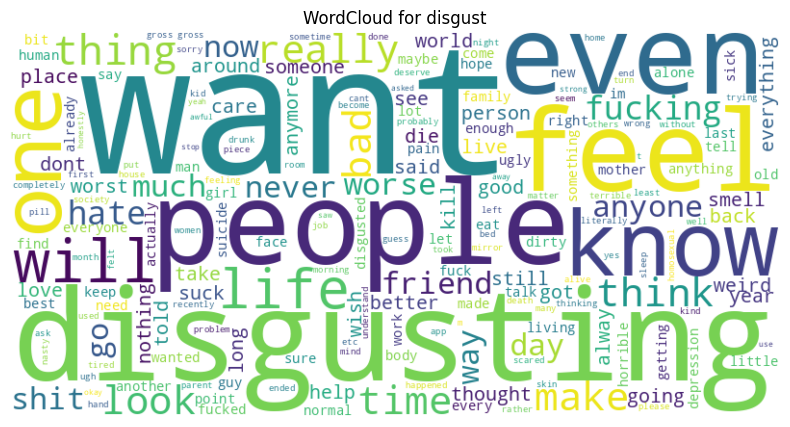

In [22]:
# wordcloud by emotion
from wordcloud import WordCloud

for emo in df['emotion'].unique():
    emo_text = " ".join(df[df['emotion'] == emo]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(emo_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud for {emo}")
    plt.axis('off')
    plt.show()


In [23]:
# 💬 Predict emotion from user-typed input
user_text = input("Enter a message to analyze your emotion: ")

if user_text.strip() != "":
    emotion_result = detect_emotion(user_text)
    print(f"🧠 Detected Emotion: {emotion_result}")
else:
    print("❗ Please enter a valid message.")


Enter a message to analyze your emotion: oh my gosh
🧠 Detected Emotion: surprise


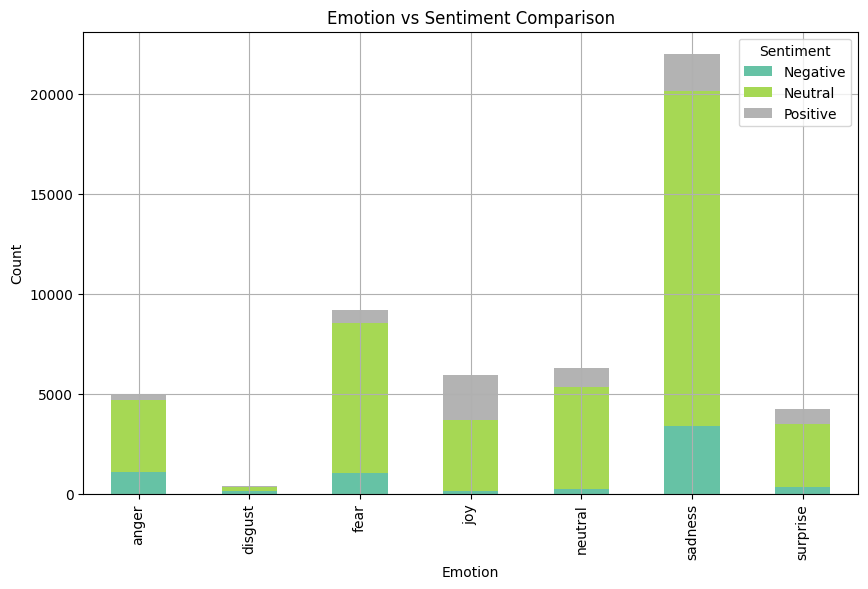

In [24]:
# 📊 Cross-tab of emotion vs sentiment
comparison = pd.crosstab(df['emotion'], df['sentiment_label'])

# 🎨 Plot as stacked bar chart
comparison.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('Emotion vs Sentiment Comparison')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(True)
plt.show()


In [26]:
# adding a mini chatbot
def moodmate_bot(query):
    query = query.lower()
    if "sad" in query or "depressed" in query:
        return "🧘‍♀️ Take a deep breath. Try journaling or going for a walk. You're not alone ❤️"
    elif "anxious" in query or "panic" in query:
        return "🌿 Practice the 5-4-3-2-1 grounding technique or try a guided meditation on YouTube."
    elif "happy" in query or "excited" in query:
        return "🎉 That's amazing! Spread that positive energy today!"
    elif "help" in query or "support" in query:
        return "💬 You can reach out to mental health helplines or talk to someone you trust. Help is available."
    else:
        return "🤖 I'm MoodMate. I respond to feelings like sadness, anxiety, happiness, or stress."

# 🧠 Chat with MoodMate
user_input = input("Talk to MoodMate: ")
print("MoodMate:", moodmate_bot(user_input))


Talk to MoodMate: i am sad 
MoodMate: 🧘‍♀️ Take a deep breath. Try journaling or going for a walk. You're not alone ❤️


Daily mood tracker

In [31]:
# mood entry input
import pandas as pd
from datetime import date

# Check if mood_log exists, otherwise create new
if 'mood_log' not in locals():
    mood_log = pd.DataFrame(columns=['Date', 'Mood'])

# 🎯 Ask user for mood input
today = date.today()
user_mood = input(f"What’s your mood today ({today})? Options: Happy, Sad, Anxious, Calm, Angry, Neutral: ")

# ✅ Create a new row as DataFrame and concatenate
new_row = pd.DataFrame({'Date': [today], 'Mood': [user_mood.capitalize()]})
mood_log = pd.concat([mood_log, new_row], ignore_index=True)

print("✅ Mood saved.")




What’s your mood today (2025-06-22)? Options: Happy, Sad, Anxious, Calm, Angry, Neutral: calm
✅ Mood saved.


/tmp/ipython-input-32-3624394273.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=mood_log, x='Mood', order=mood_log['Mood'].value_counts().index, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


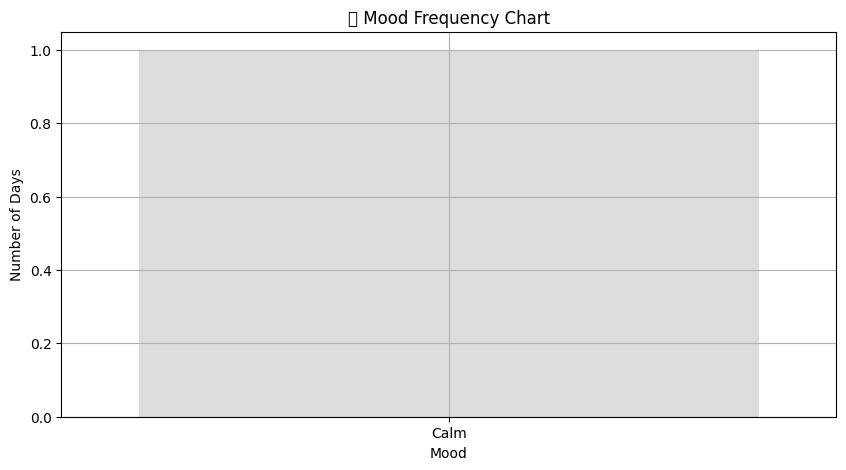

In [32]:
# mood tracker plot
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure 'Date' is in datetime format
mood_log['Date'] = pd.to_datetime(mood_log['Date'])

# 📊 Bar chart: Count of each mood
plt.figure(figsize=(10, 5))
sns.countplot(data=mood_log, x='Mood', order=mood_log['Mood'].value_counts().index, palette='coolwarm')
plt.title("🧠 Mood Frequency Chart")
plt.xlabel("Mood")
plt.ylabel("Number of Days")
plt.grid(True)
plt.show()


/tmp/ipython-input-33-558523163.py:23: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


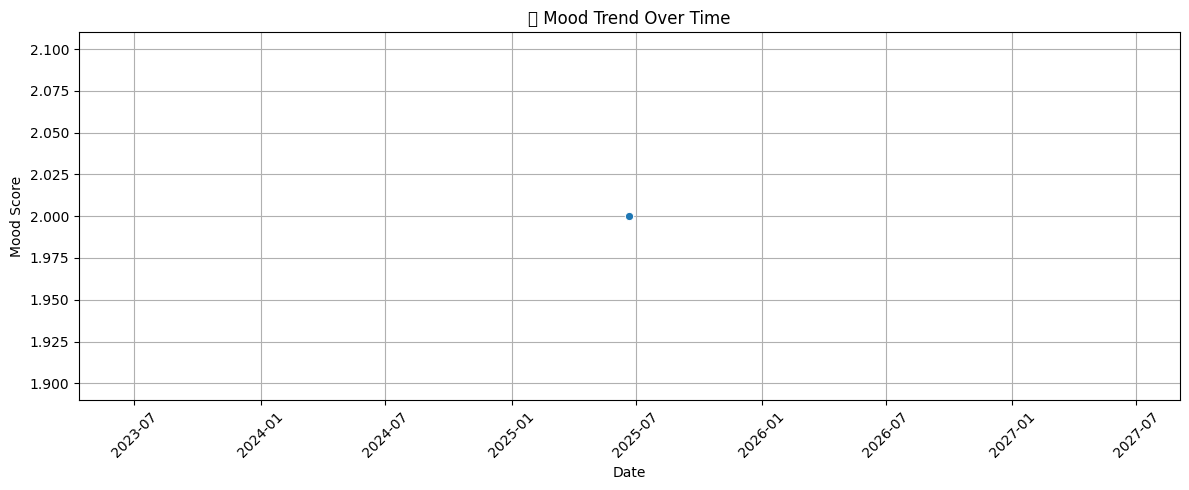

In [33]:
# Assign numeric values to moods for plotting
mood_to_num = {
    "Happy": 3,
    "Calm": 2,
    "Neutral": 1,
    "Sad": -1,
    "Anxious": -2,
    "Angry": -3
}
mood_log['Mood_Score'] = mood_log['Mood'].map(mood_to_num)

# Sort by date
mood_log = mood_log.sort_values('Date')

# 📈 Line chart
plt.figure(figsize=(12, 5))
sns.lineplot(data=mood_log, x='Date', y='Mood_Score', marker='o')
plt.title("📆 Mood Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Mood Score")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:

from datetime import date

# Assign today’s date to every row in df
df['Date'] = date.today()
df['Date'] = pd.to_datetime(df['Date']).dt.date
mood_log['Date'] = pd.to_datetime(mood_log['Date']).dt.date
merged_df = pd.merge(mood_log, df, on='Date', how='inner')





In [43]:
# Export final merged data
merged_df.to_csv("MindLens_Final_Merged_Data.csv", index=False)

from google.colab import files
files.download("MindLens_Final_Merged_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>